In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs  
from sklearn.metrics import silhouette_score 
sns.set()

In [13]:
X,y=make_blobs(n_samples=1000,centers=10)
df=pd.DataFrame(X,columns=["F1","F2"])
df.head()

,F1,F2
0,0.430882,-0.870593
1,-1.079498,-1.032126
2,0.472129,0.349853
3,-0.710267,1.257342
4,-4.737352,-6.061377


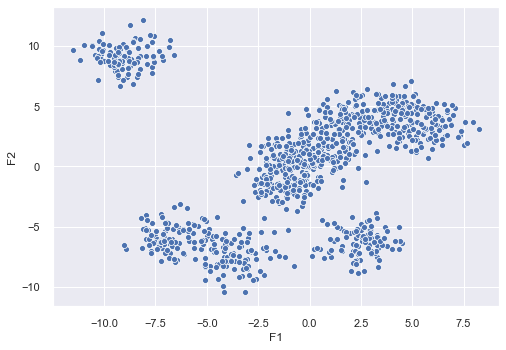

In [14]:
sns.scatterplot("F1","F2",data=df)

In [15]:
from sklearn.preprocessing import MinMaxScaler 
df1=pd.DataFrame(MinMaxScaler().fit_transform(df),columns=df.columns)
df.head()

,F1,F2
0,0.430882,-0.870593
1,-1.079498,-1.032126
2,0.472129,0.349853
3,-0.710267,1.257342
4,-4.737352,-6.061377


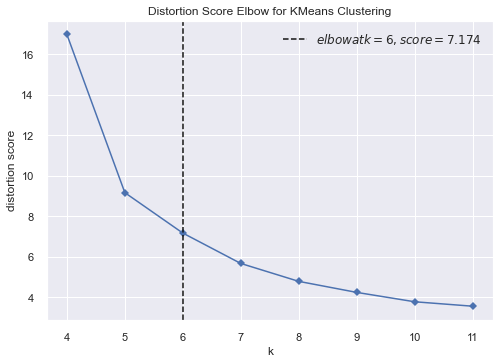

In [16]:
from yellowbrick.cluster import KElbowVisualizer 
model=KMeans()
visualiser=KElbowVisualizer(model,k=(4,12),timings=False)
visualiser.fit(df1)
visualiser.show()

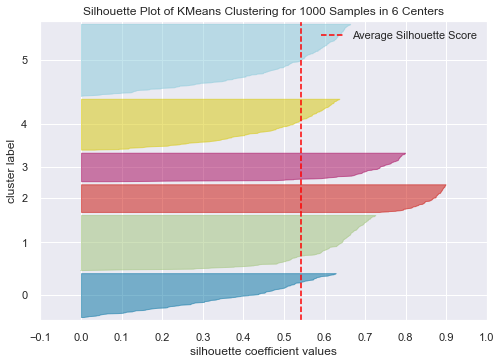

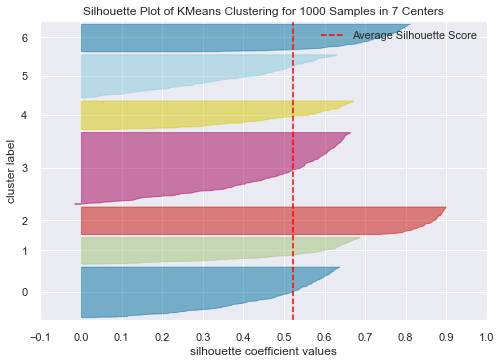

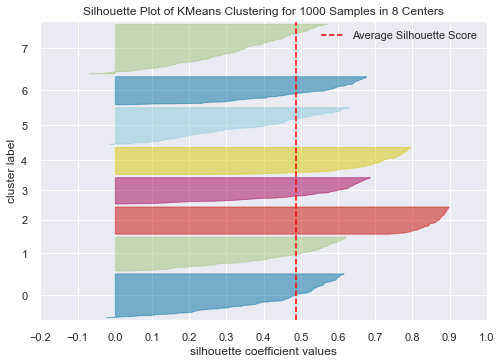

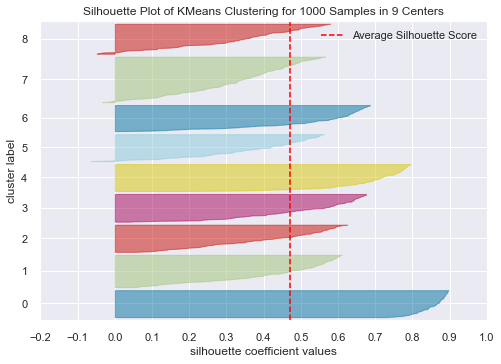

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer
L=[6,7,8,9]
for i in L:
    model=KMeans(n_clusters=i)
    visualiser1=SilhouetteVisualizer(model,colors="yellowbrick")
    visualiser1.fit(df1)
    visualiser1.show()


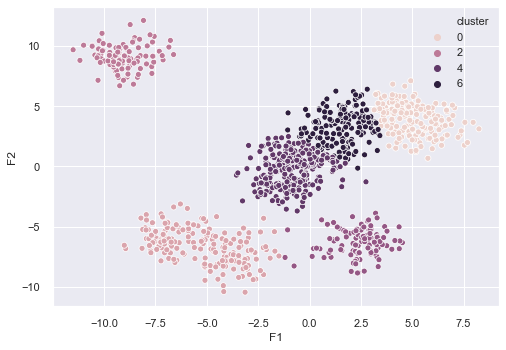

In [19]:
final_model=KMeans(n_clusters=6)
final_model.fit(df1)
y_pred=final_model.predict(df1)
df["cluster"]=y_pred
sns.scatterplot("F1","F2",data=df,hue="cluster")